In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import utils.file_utils as fu

RUNPATH="/data/prevel/runs/167_19:26/"

#RUNPATH="./fullrun"

In [2]:
flag_first=True
for gen in fu.file_list(RUNPATH,file_format=".csv"):
    ndf=pd.read_csv(gen)
    if flag_first:
        full_df=ndf
        flag_first=False
    else:
        full_df=pd.concat([full_df,ndf],axis="index")
full_df.index=full_df.iloc[:,0]
full_df.head()

/data/prevel/miniconda3/envs/bio/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Unnamed: 0,cr_dist,fit_cor,fit_corankle,fit_corhip,fit_corknee,fit_energy,fit_rms,fit_rmsankle,fit_rmship,...,kd,klean,kp,kref,solsol_wf,solta_wf,ta_bl,tata_wl,uid,vasvas_wf
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,89.878052,85.701580,87.546256,96.386321,-23.905492,-8.605033,-2.353577,-3.392141,...,0.379838,0.569253,1.325475,0.077974,1.641520,0.484989,0.651244,0.696049,gen9ind1,1.735475
NaN,NaN,NaN,60.097197,31.321061,89.333610,59.636920,-32.486559,-16.521204,-3.953902,-5.985729,...,0.311444,0.821088,0.884919,0.072417,1.276913,0.455158,0.642552,0.652467,gen9ind2,1.871225
NaN,NaN,NaN,83.131797,86.081378,77.165919,86.148093,-39.181430,-11.829620,-1.609627,-6.427034,...,0.552332,0.943810,1.459126,0.090907,1.127555,0.519692,0.661987,0.537925,gen9ind3,1.146086
NaN,NaN,NaN,85.911147,76.213273,86.915289,94.604878,-22.185498,-9.796339,-3.220554,-3.057345,...,0.455894,1.406621,0.943535,0.078376,1.635370,0.617716,0.795397,0.863037,gen9ind4,1.342893
NaN,NaN,NaN,81.464038,82.299534,94.219968,67.872613,-23.171566,-12.105381,-2.125180,-3.880713,...,0.517570,1.222336,1.205475,0.111490,1.486418,0.529405,0.602629,0.606345,gen9ind5,1.092007


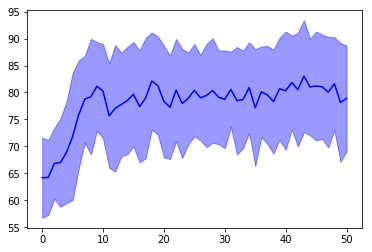

In [3]:
dev=full_df.groupby('gen').std()
mu=full_df.groupby('gen').mean()
best=full_df.groupby('gen').max()
from utils.plot_utils import plot_mean_std_fill
ax=plot_mean_std_fill(mu.fit_cor,dev.fit_cor,'b')

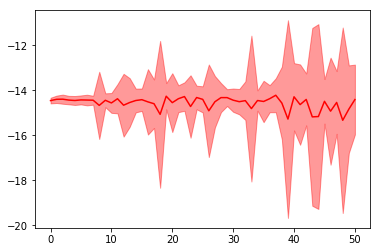

In [4]:
plot_mean_std_fill(mu.fit_rms,dev.fit_rms,'r')

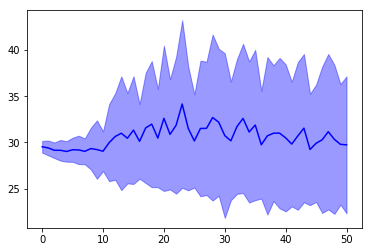

In [4]:
plot_mean_std_fill(mu.fit_energy.abs(),dev.fit_energy.abs(),'b')

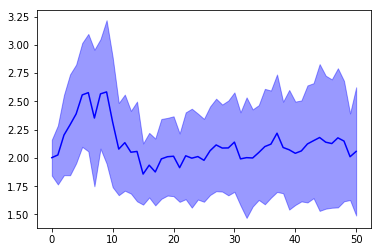

In [6]:
ax=plot_mean_std_fill(mu.solsol_wf,dev.solsol_wf,'b')

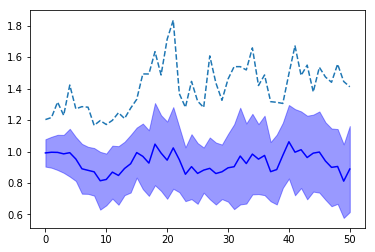

In [5]:
ax=plot_mean_std_fill(mu.solta_wf,dev.solta_wf,'b')
plt.plot(best.solta_wf,ls='--')

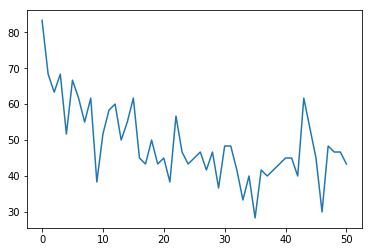

In [4]:
stab=full_df[full_df.fit_stable==1]
stab=stab.dropna(axis='columns')
plt.plot(100*stab.groupby("gen").uid.count()/60)

In [7]:
stab.sort_values("fit_rmsknee",ascending=False)

,fit_cor,fit_corankle,fit_corhip,fit_corknee,fit_energy,fit_rms,fit_rmsankle,fit_rmship,fit_rmsknee,fit_stable,gasgas_wf,gen,sol_activitybasal,solsol_wf,solta_wf,ta_bl,tata_wl,uid
Unnamed: 0,,,,,,,,,,,,,,,,,,
NaN,89.860475,82.444719,88.589958,98.546749,-24.686079,-9.048054,-3.152591,-4.597948,-1.297514,1.0,1.745208,47.0,0.022665,1.028408,0.893168,0.872882,1.136883,gen47ind58
NaN,89.168459,80.582175,88.367573,98.555628,-24.401420,-9.076412,-3.208901,-4.491130,-1.376381,1.0,1.745208,45.0,0.023087,1.063876,0.909743,0.872882,1.250865,gen45ind25
NaN,88.837331,79.999694,87.921090,98.591209,-24.495264,-9.004717,-3.036936,-4.579732,-1.388049,1.0,1.745208,46.0,0.020177,1.067667,0.909743,0.872882,1.250865,gen46ind1
NaN,89.495937,83.622634,86.139999,98.725176,-24.983774,-9.230233,-3.086183,-4.755594,-1.388456,1.0,1.602542,45.0,0.024827,0.986836,1.154762,0.850954,1.073355,gen45ind10
NaN,89.832880,83.448536,87.842133,98.207972,-25.240169,-9.333308,-3.259779,-4.574012,-1.499517,1.0,1.785352,44.0,0.024827,0.986836,1.154762,0.867529,1.073355,gen44ind35
NaN,90.296166,86.621033,86.333430,97.934037,-26.103076,-8.774734,-2.622100,-4.562523,-1.590112,1.0,1.869724,37.0,0.033849,0.978466,0.676235,0.726761,0.789754,gen37ind33
NaN,90.397509,86.334088,86.752329,98.106111,-25.935027,-8.857809,-2.815209,-4.448241,-1.594359,1.0,1.882512,42.0,0.033849,1.012424,0.676235,0.724559,0.669151,gen42ind27
NaN,89.449464,81.466541,88.729493,98.152359,-24.574888,-9.274900,-3.365153,-4.310251,-1.599497,1.0,1.822510,46.0,0.025013,1.052860,0.958262,0.872882,1.170516,gen46ind42
NaN,90.834962,86.331593,88.054408,98.118886,-25.966143,-8.845664,-2.772926,-4.472045,-1.600693,1.0,1.869724,41.0,0.033399,0.978466,0.767290,0.758001,0.840119,gen41ind43


In [5]:
b=stab.sort_values("fit_rms",ascending=False)
b.drop(b.filter(like="fit"),axis='columns')

,gasgas_wf,gen,gluglu_wf,ham_bl,hamham_wf,hamhf_wl,hf_bl,hfhf_wl,kd,klean,kp,kref,solsol_wf,solta_wf,ta_bl,tata_wl,uid,vasvas_wf
Unnamed: 0,,,,,,,,,,,,,,,,,,
NaN,2.054817,48.0,0.578144,0.244781,0.305675,4.986995,0.766990,0.443848,0.751777,0.976592,2.310079,0.059196,1.384899,0.289437,0.621195,0.594561,gen48ind26,1.561952
NaN,1.716626,47.0,0.331773,0.435423,0.343928,3.810164,0.543742,0.533405,0.468489,1.025250,2.245230,0.075301,1.540584,0.289086,0.592348,0.700558,gen47ind29,1.412831
NaN,2.087430,32.0,0.599737,0.396278,0.319427,5.892932,0.653152,0.391728,0.737110,0.979940,1.434688,0.062179,1.705037,0.328519,0.648552,0.682013,gen32ind1,1.647304
NaN,1.827386,41.0,0.331773,0.357200,0.336602,3.810164,0.940060,0.533405,0.468489,1.220545,2.124860,0.079695,1.535191,0.289086,0.557563,0.532686,gen41ind23,1.412831
NaN,2.392026,37.0,0.664031,0.439246,0.331697,4.468900,0.528153,0.434496,0.616889,1.022294,1.610303,0.064827,1.676058,0.190807,0.457209,0.503900,gen37ind45,1.768146
NaN,1.716626,48.0,0.320462,0.433534,0.361387,3.914602,0.546167,0.504936,0.539912,1.025250,2.245230,0.081210,1.520933,0.289086,0.608738,0.892205,gen48ind14,1.461652
NaN,2.212040,43.0,0.432955,0.299983,0.274447,5.289700,0.366408,0.459927,0.581290,1.603964,1.434445,0.066226,1.426816,0.371718,0.528160,0.540233,gen43ind54,1.716176
NaN,2.176212,49.0,0.384690,0.312146,0.343280,4.620703,0.672822,0.523429,0.584260,2.440904,1.575368,0.066226,1.589546,0.371718,0.528895,0.629045,gen49ind36,1.784775
NaN,2.171440,35.0,0.441759,0.381492,0.305558,5.346643,0.557947,0.349993,0.637119,1.624650,1.461355,0.069478,1.624455,0.503545,0.575178,0.745975,gen35ind38,1.589693


In [8]:
stab.sort_values("fit_rmship",ascending=False)

,fit_cor,fit_corankle,fit_corhip,fit_corknee,fit_energy,fit_rms,fit_rmsankle,fit_rmship,fit_rmsknee,fit_stable,gasgas_wf,gen,sol_activitybasal,solsol_wf,solta_wf,ta_bl,tata_wl,uid
Unnamed: 0,,,,,,,,,,,,,,,,,,
NaN,72.625154,41.259792,87.575086,89.040585,-25.200867,-11.305316,-4.754952,-2.239407,-4.310957,1.0,2.035786,35.0,0.031336,2.072942,1.188063,0.794718,1.190647,gen35ind45
NaN,66.600568,30.097921,86.665028,83.038755,-28.532220,-11.882816,-4.469198,-2.390926,-5.022692,1.0,1.978862,12.0,0.057836,2.278822,0.666631,0.620762,1.495735,gen12ind60
NaN,59.116749,2.229497,86.260078,88.860673,-26.351875,-11.198140,-4.048201,-2.417696,-4.732243,1.0,1.790937,40.0,0.030643,2.005036,1.279591,0.398558,0.898866,gen40ind44
NaN,74.936180,49.066356,86.447462,89.294721,-24.215159,-11.539041,-4.878878,-2.457283,-4.202881,1.0,2.035786,30.0,0.031725,2.072942,1.225270,0.794718,0.966895,gen30ind3
NaN,76.143767,49.012972,88.043028,91.375301,-23.866773,-10.254860,-4.096211,-2.546848,-3.611802,1.0,1.871915,39.0,0.023087,1.885520,1.130321,0.818119,1.269145,gen39ind3
NaN,73.832078,46.309136,86.838894,88.348204,-30.276957,-11.485896,-4.791043,-2.547645,-4.147208,1.0,2.341179,31.0,0.039067,2.138521,1.083043,0.741751,1.104149,gen31ind18
NaN,71.657588,42.978197,84.930041,87.064527,-26.130069,-11.622216,-4.807833,-2.570821,-4.243562,1.0,2.640814,39.0,0.031336,2.072942,1.248799,0.802652,1.260952,gen39ind59
NaN,57.313096,-2.330386,84.884909,89.384765,-25.960079,-11.368084,-4.273271,-2.571193,-4.523620,1.0,1.790937,46.0,0.030201,2.210365,1.279591,0.431640,0.948073,gen46ind35
NaN,78.003472,54.588246,88.283640,91.138531,-28.574539,-10.853759,-4.158363,-2.575401,-4.119995,1.0,1.820841,11.0,0.072417,1.886164,0.835704,0.550278,1.217947,gen11ind60
